In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from math import sqrt 

# Read Data

In [2]:
df = pd.read_csv('Mobile-DataSet-Pre-Processed.csv')
df.head()

,Brand,RAM,Rear Camera,Front Camera,Battery,Display Size,Resolution,Screen To Body Ratio,ROM,Price,Processor
0,3,4,52,8.0,6000.0,6.82,2360,83.23,64,8499.0,16.40
1,3,3,11,5.0,5000.0,6.82,2320,83.73,64,8299.0,14.00
2,3,4,21,8.0,6000.0,6.82,2360,82.94,64,8999.0,14.44
3,8,4,15,5.0,6000.0,6.82,2360,78.70,64,9918.0,12.80
4,8,3,15,5.0,6000.0,6.82,2360,78.70,32,8090.0,12.80


# y => dependent veriable 'Price'
# X => Independent variables

In [3]:
y = df['Price']
X = df.drop('Price', axis=1, )

# Split the Data for training and Testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

# Creating and Training Model 

In [5]:
rf = RandomForestRegressor(n_estimators=20, max_depth=15)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=20)

# Make a Price prediction for data

In [7]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

# Trained Data 

Text(0.5, 1.0, 'Trained Data')

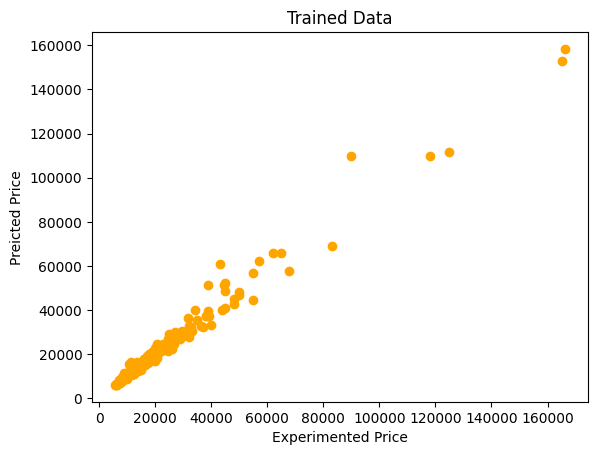

In [23]:
plt.scatter(y_train, y_rf_train_pred, c = 'orange') 
plt.ylabel('Preicted Price')
plt.xlabel('Experimented Price')
plt.title('Trained Data')

# Test Data

Text(0.5, 1.0, 'Test Data')

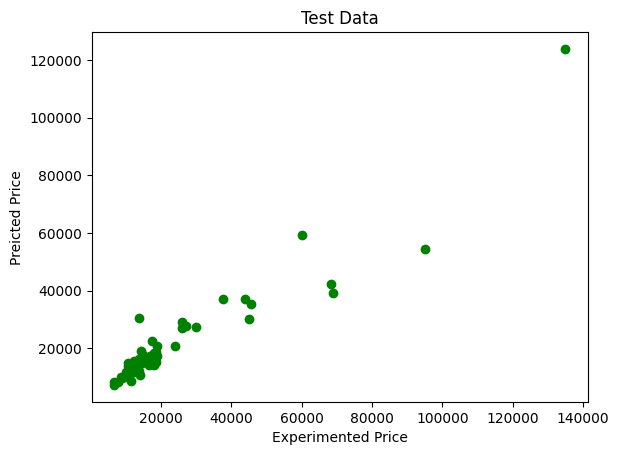

In [20]:
plt.scatter(y_test, y_rf_test_pred, c='g') 
plt.ylabel('Preicted Price')
plt.xlabel('Experimented Price')
plt.title('Test Data')

# Find the mean squared error and R2 score

In [11]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred) 
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

LR MSE (TRAIN) 10203586.998730155
LR R2 (TRAIN) 0.9759882644071463
LR MSE (TEST) 69127986.18866394
LR R2 (TEST) 0.8590914978447318


# The Results

In [17]:
results = pd.DataFrame(columns=['Data Used', 'mean squared error (MSE)', 'root mean squared error (RMSE)', ' R-squared (coefficient of determination)']) 

In [18]:
results.loc[len(results)] = ['TRAIN', rf_train_mse, sqrt(rf_train_mse), rf_train_r2]
results.loc[len(results)] = ['TEST', rf_test_mse, sqrt(rf_test_mse), rf_test_r2]

In [19]:
results

,Data Used,mean squared error (MSE),root mean squared error (RMSE),R-squared (coefficient of determination)
0,TRAIN,1.020359e+07,3194.305402,0.975988
1,TEST,6.912799e+07,8314.324157,0.859091
